In [1]:
#For several of the following exercises, you'll need to load several datasets using the pydataset library. 
#If you get an error when trying to run the import below, use pip to install the pydataset package.

In [2]:
from pydataset import data

In [3]:
#When the instructions say to load a dataset, you can pass the name of the dataset as a string to the data function to load the dataset. You can also view the documentation for the data set by passing the show_doc keyword argument.

In [4]:
# data('mpg', show_doc=True) # view the documentation for the dataset
# mpg = data('mpg') # load the dataset and store it in a variable

In [5]:
#All the datasets loaded from the pydataset library will be pandas dataframes.

# Problem #1

In [6]:
import pandas as pd

In [7]:
#1. Copy the code from the lesson to create a dataframe full of student grades.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pydataset import data

np.random.seed(123)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# randomly generate scores for each student for each subject
# note that all the values need to have the same length here
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades})

In [8]:
df

,name,math,english,reading
0,Sally,62,85,80
1,Jane,88,79,67
2,Suzie,94,74,95
3,Billy,98,96,88
4,Ada,77,92,98
5,John,79,76,93
6,Thomas,82,64,81
7,Marie,93,63,90
8,Albert,92,62,87
9,Richard,69,80,94


In [9]:
#a. Create a column named passing_english that indicates whether each student has a passing grade in reading.

df.english >= 70
df['passing_english'] = df.english >= 70
(df['passing_english'] == False).sum()

4

In [10]:
#b. Sort the english grades by the passing_english column. How are duplicates handled?

df.sort_values(by='passing_english')

,name,math,english,reading,passing_english
6,Thomas,82,64,81,False
7,Marie,93,63,90,False
8,Albert,92,62,87,False
11,Alan,92,62,72,False
0,Sally,62,85,80,True
1,Jane,88,79,67,True
2,Suzie,94,74,95,True
3,Billy,98,96,88,True
4,Ada,77,92,98,True
5,John,79,76,93,True


In [11]:
#c. Sort the english grades first by passing_english and then by student name. All the students that are failing english should be first, and within the students that are failing english they should be ordered alphabetically. The same should be true for the students passing english. (Hint: you can pass a list to the .sort_values method)

df.sort_values(by=['passing_english', 'name'])

,name,math,english,reading,passing_english
11,Alan,92,62,72,False
8,Albert,92,62,87,False
7,Marie,93,63,90,False
6,Thomas,82,64,81,False
4,Ada,77,92,98,True
3,Billy,98,96,88,True
10,Isaac,92,99,93,True
1,Jane,88,79,67,True
5,John,79,76,93,True
9,Richard,69,80,94,True


In [12]:
#d. Sort the english grades first by passing_english, and then by the actual english grade, similar to how we did in the last step.

df.sort_values(by=['passing_english', 'english'])

,name,math,english,reading,passing_english
8,Albert,92,62,87,False
11,Alan,92,62,72,False
7,Marie,93,63,90,False
6,Thomas,82,64,81,False
2,Suzie,94,74,95,True
5,John,79,76,93,True
1,Jane,88,79,67,True
9,Richard,69,80,94,True
0,Sally,62,85,80,True
4,Ada,77,92,98,True


In [13]:
#e. Calculate each students overall grade and add it as a column on the dataframe. The overall grade is the average of the math, english, and reading grades.

totals = df.iloc[:, 1:4].sum(axis=1)
df['overall_average'] = round((totals / 3), 0).astype(int)
df


,name,math,english,reading,passing_english,overall_average
0,Sally,62,85,80,True,76
1,Jane,88,79,67,True,78
2,Suzie,94,74,95,True,88
3,Billy,98,96,88,True,94
4,Ada,77,92,98,True,89
5,John,79,76,93,True,83
6,Thomas,82,64,81,False,76
7,Marie,93,63,90,False,82
8,Albert,92,62,87,False,80
9,Richard,69,80,94,True,81


# Problem #2

In [14]:
#2. Load the mpg dataset. Read the documentation for the dataset and use it for the following questions:

data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [15]:
mpg = data('mpg')

In [16]:
# How many rows and columns are there?

mpg.shape

(234, 11)

In [17]:
# What are the data types of each column?

mpg.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

In [18]:
# Summarize the dataframe with .info and .describe

mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [19]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [20]:
# Rename the cty column to city.

mpg.rename(columns={'cty': 'city'}, inplace=True)
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


In [21]:
# Rename the hwy column to highway.

mpg.rename(columns={'hwy': 'highway'}, inplace=True)
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


In [22]:
# Do any cars have better city mileage than highway mileage?

bool_series = mpg.city > mpg.highway
mpg[bool_series]
bool_series.sum()

0

In [23]:
# Create a column named mileage_difference this column should contain the difference between highway and city mileage for each car.

mpg = mpg.assign(mileage_difference = mpg.highway - mpg.city)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10


In [24]:
# Which car (or cars) has the highest mileage difference?

bool_series = mpg.mileage_difference == mpg.mileage_difference.max()
mpg[bool_series][['manufacturer', 'model', 'mileage_difference']]

,manufacturer,model,mileage_difference
107,honda,civic,12
223,volkswagen,new beetle,12


In [25]:
# Which compact class car has the lowest highway mileage? The best?

bool_series = mpg['class'] == 'compact'
compacts = mpg[bool_series]
compacts.sort_values(by='highway').head(1) 

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
220,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact,7


In [26]:
compacts.sort_values(by='highway').tail(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,11


In [27]:
# Create a column named average_mileage that is the mean of the city and highway mileage.

mpg['average_mileage'] = (mpg.city + mpg.highway) / 2
mpg.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0


In [28]:
# Which dodge car has the best average mileage? The worst?

bool_series = mpg.manufacturer == 'dodge'
dodges = mpg[bool_series]
dodges.sort_values(by='average_mileage').tail(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
38,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan,6,21.0


In [29]:
dodges.sort_values(by='average_mileage').head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
70,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,3,10.5


# Problem #3

In [30]:
#3. Load the Mammals dataset. Read the documentation for it, and use the data to answer these questions:

data('Mammals', show_doc=True)
mammals = data('Mammals')
mammals.head()

Mammals

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Garland(1983) Data on Running Speed of Mammals

### Description

Observations on the maximal running speed of mammal species and their body
mass.

### Usage

    data(Mammals)

### Format

A data frame with 107 observations on the following 4 variables.

weight

Body mass in Kg for "typical adult sizes"

speed

Maximal running speed (fastest sprint velocity on record)

hoppers

logical variable indicating animals that ambulate by hopping, e.g. kangaroos

specials

logical variable indicating special animals with "lifestyles in which speed
does not figure as an important factor": Hippopotamus, raccoon (Procyon),
badger (Meles), coati (Nasua), skunk (Mephitis), man (Homo), porcupine
(Erithizon), oppossum (didelphis), and sloth (Bradypus)

### Details

Used by Chappell (1989) and Koenker, Ng and Portnoy (1994) to illustrate the
fitting of piecewise linear curves.

### Source

Garland, T. (

,weight,speed,hoppers,specials
1,6000.0,35.0,False,False
2,4000.0,26.0,False,False
3,3000.0,25.0,False,False
4,1400.0,45.0,False,False
5,400.0,70.0,False,False


In [31]:
# How many rows and columns are there?

mammals.shape

(107, 4)

In [32]:
# What are the data types?

mammals.dtypes

weight      float64
speed       float64
hoppers        bool
specials       bool
dtype: object

In [33]:
# Summarize the dataframe with .info and .describe

mammals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 1 to 107
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   weight    107 non-null    float64
 1   speed     107 non-null    float64
 2   hoppers   107 non-null    bool   
 3   specials  107 non-null    bool   
dtypes: bool(2), float64(2)
memory usage: 2.7 KB


In [34]:
mammals.describe()

,weight,speed
count,107.000000,107.000000
mean,278.688178,46.208411
std,839.608269,26.716778
min,0.016000,1.600000
25%,1.700000,22.500000
50%,34.000000,48.000000
75%,142.500000,65.000000
max,6000.000000,110.000000


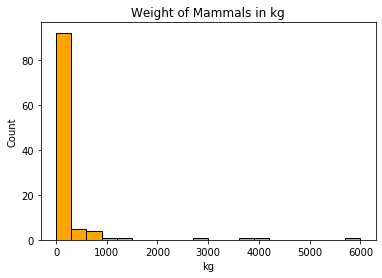

In [35]:
plt.hist(mammals.weight, bins=20, color='orange', edgecolor='black')

plt.title('Weight of Mammals in kg')
plt.xlabel('kg')
plt.ylabel('Count')

plt.show()

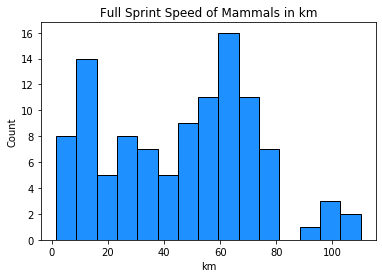

In [36]:
plt.hist(mammals.speed, bins=15, color='dodgerblue', edgecolor='black')

plt.title('Full Sprint Speed of Mammals in km')
plt.xlabel('km')
plt.ylabel('Count')

plt.show()

In [37]:
# What is the the weight of the fastest animal?
mammals.loc[mammals.speed.idxmax()].weight

55.0

In [38]:
# What is the overall percentage of specials?
total_specials = mammals.specials.sum()
total_mammals = len(mammals)
overall_percentage_of_specials = round(total_specials / total_mammals * 100,2)
print(f'{overall_percentage_of_specials}%')

9.35%


In [39]:
# How many animals are hoppers that are above the median speed? What percentage is this?
median_speed = mammals.speed.median() 
median_speed

48.0

In [40]:
bool_series = (mammals.speed > median_speed) & (mammals.hoppers == True)
fast_hoppers = mammals[bool_series]

In [41]:
percentage_of_hoppers = round((len(fast_hoppers) / len(mammals)) * 100,2)
print(f'{percentage_of_hoppers}%')

6.54%
